In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# x_train: size of houses in 1000 square feet
x_train = np.array([1, 2])

# y_train: price of houses in $1000 dollars
y_train = np.array([300, 500])

print(f'x_train = {x_train}')
print(f'y_train = {y_train}')

x_train = [1 2]
y_train = [300 500]


In [3]:
# m is the number of training examples
m = x_train.shape[0]
print(f'Number of training examples: {m}')

Number of training examples: 2


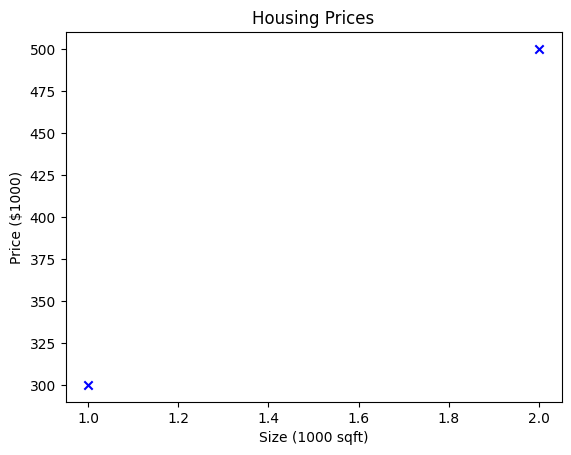

In [4]:
# Scatter plot of training data
plt.scatter(x_train, y_train, marker='x', c='blue')
plt.title('Housing Prices')
plt.ylabel('Price ($1000)')
plt.xlabel('Size (1000 sqft)')
plt.show()

In [5]:
# Compute the model's predicted output
def compute_model_output(x, w, b):
    return (w * x) + b

In [6]:
# Calculate the total cost function for linear regression
def calculate_total_cost(x, y, w, b):
    m = x.shape[0]
    cost_sum = 0
    
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
        
    total_cost = (1 / (2 * m)) * cost_sum
    return total_cost

In [20]:
def compute_gradient(x, y, w, b): 
    # Number of training examples
    m = x.shape[0]    
    dj_dw = 0
    dj_db = 0
    
    for i in range(m):  
        f_wb = w * x[i] + b 
        dj_dw_i = (f_wb - y[i]) * x[i] 
        dj_db_i = f_wb - y[i] 
        dj_db += dj_db_i
        dj_dw += dj_dw_i 
    dj_dw = dj_dw / m 
    dj_db = dj_db / m 
        
    return dj_dw, dj_db

In [21]:
# Function to perform gradient descent over multiple iterations
def perform_gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost_history):
    w = w_init
    b = b_init
    cost_history = []
    for i in range(num_iters):
        # Perform batch gradient descent
        dj_dw, dj_db = compute_gradient(x, y, w, b)
        w = w - alpha * dj_dw  # update weight
        b = b - alpha * dj_db  # update bias
        cost = calculate_total_cost(x, y, w, b)
        cost_history.append(cost)
        # if i % 10 == 0:  # print cost every 100 iterations
        #     print(f"Iteration {i}: Cost = {cost}, w = {w}, b = {b}")
    return w, b, cost_history

In [13]:
# Linear model: f(x) = w * x + b
w_init = 190  # initial weight (slope)
b_init = 100 # initial bias (intercept)
alpha = 0.01  # learning rate
iterations = 150  # number of iterations for gradient descent
cost_history = [] 

Final values after gradient descent: w = 197.48393618355794, b = 103.98451788498991
Predicted Values by Model: [301.46845407 498.95239025]


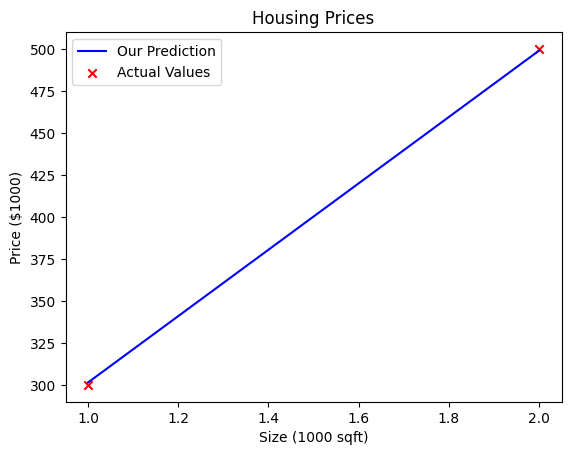

In [22]:
# Perform gradient descent to optimize w and b
final_w, final_b, cost_history = perform_gradient_descent(x_train, y_train, w_init, b_init, alpha, iterations, cost_history)
print(f'Final values after gradient descent: w = {final_w}, b = {final_b}')

# Plot the final prediction line
predicted_values = compute_model_output(x_train, final_w, final_b)
print(f"Predicted Values by Model: {predicted_values}")

plt.plot(x_train, predicted_values, c='b', label='Our Prediction')
plt.scatter(x_train, y_train, marker='x', c='r', label='Actual Values')

plt.title('Housing Prices')
plt.ylabel('Price ($1000)')
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

# Plot the learning curve

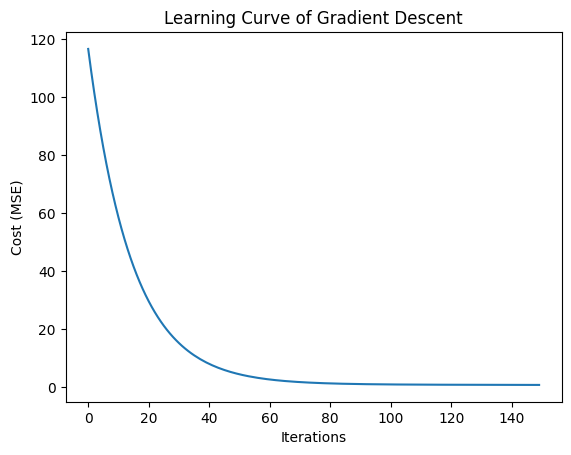

In [23]:
plt.plot(cost_history)
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Learning Curve of Gradient Descent')
plt.show()

In [24]:
size_in_sqft = 1.12 # Size in 1000 square feet
predicted_price = compute_model_output(size_in_sqft, final_w, final_b)

print(f"Predicted price for a house of {size_in_sqft * 1000} sqft is: ${predicted_price * 1000}")

Predicted price for a house of 1120.0 sqft is: $325166.5264105748


# Linear Regression With Multiple Features

In [26]:
# x_train: size in square feet, No of Bedrooms, Number of Floors, Age of House in years of houses
house_sizes = np.array([2.104, 1.416, 1.534, 2.521])
no_of_bedrooms = np.array([5, 3, 3, 2])
no_of_floors = np.array([2, 1, 2, 1])
age_of_house = np.array([2, 4, 3, 3])
x_train = np.array([house_sizes, no_of_bedrooms, no_of_floors, age_of_house]).T

# y_train: price of houses in $1000 dollars
y_train = np.array([460, 232, 315, 178])

print(x_train)

[[2.104 5.    2.    2.   ]
 [1.416 3.    1.    4.   ]
 [1.534 3.    2.    3.   ]
 [2.521 2.    1.    3.   ]]


In [27]:
b = 100
w_init = np.array([100, 80, 90, 50]) 

In [28]:
def compute_model_output(x, w, b):
    return np.dot(w, x) + b

In [29]:
def calculate_cost(w, b, x, y):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = compute_model_output(x[i], w, b)
        err = (f_wb - y[i]) ** 2
        cost += err
        
    total_cost = (1/(2 * m)) * cost
    return total_cost

In [30]:
def compute_gradient(w, b, x, y):
    m = x.shape[0] 
    dj_dw = np.zeros(len(w))
    dj_db = 0
    
    for i in range(m):
        f_wb = compute_model_output(x[i], w, b)
        error = f_wb - y[i]
        dj_dw += error * x[i] 
        dj_db += error        
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [31]:
def perform_multiple_gradient_descent(w, b, x, y, alpha, num_iters):
    cost_history = []
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(w, b, x, y)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        cost = calculate_cost(w, b, x, y)
        cost_history.append(cost)
        if i % 10000 == 0:
            print(f"Iteration: {i}, Cost: {cost}")
    return w, b, cost_history

Iteration: 0, Cost: 79132.70743008671
Optimized weights: [  3.30863635  59.61333064  67.57688716 -25.19043337]
Optimized bias: 70.90526132443784


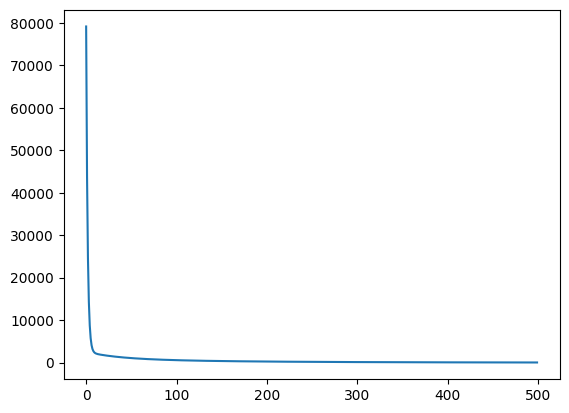

In [32]:
alpha = 0.01
num_iters = 500
w_opt, b_opt, cost_history = perform_multiple_gradient_descent(w_init, b, x_train, y_train, alpha, num_iters)

print(f'Optimized weights: {w_opt}')
print(f'Optimized bias: {b_opt}')
plt.plot(cost_history)

In [33]:
# x_train features: size in 1000 square feet, number of bedrooms, number of floors, age of house in years
new_house_features = np.array([2.104, 5, 2, 2])
predicted_value = compute_model_output(new_house_features, w_opt, b_opt)
print(f"A house with {new_house_features[0] * 1000} sq ft, {new_house_features[1]} bedrooms, {new_house_features[2]} floors, and {new_house_features[3]} years old is predicted to cost: ${predicted_value * 1000:.2f}")

A house with 2104.0 sq ft, 5.0 bedrooms, 2.0 floors, and 2.0 years old is predicted to cost: $460706.19


# Feature Scaling

In [34]:
# Min-Max Scaling
def min_max_scaling(x):
    max_num = max(x)
    min_num = min(x)

    scaled_x = (x - min_num) / (max_num - min_num)
    
    return scaled_x

In [35]:
# Mean Nomalization
def mean_normalization(x):
    mean = x.mean()
    max_num = max(x)
    min_num = min(x)

    scaled_x = (x - mean) / (max_num - min_num)

    return scaled_x

In [36]:
def z_score_norm(X):
    mean = np.mean(X, axis=0)
    std = np.std(X, axis=0)
    return (X - mean) / std

# Feature Engineering and Polynomial Regression

Iteration: 0, Cost: 13145.964445997059


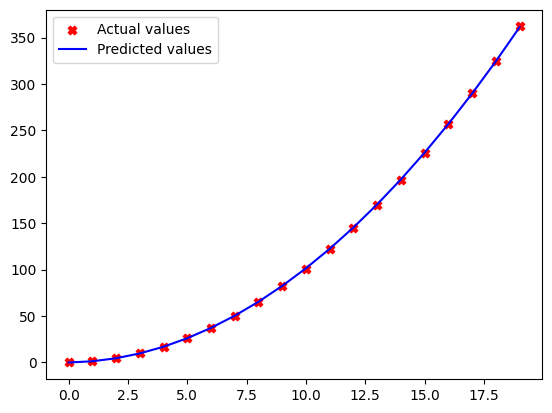

In [37]:
# Polynomial features
x = np.arange(0, 20, 1)
y = 1 + x**2

# Create a polynomial feature matrix (e.g., x, x^2)
# X = np.c_[x, x**2, x**3]
X = np.c_[x, x**2]
X = z_score_norm(X)  # Normalize the features

# Initialize weights for each feature
w_init = np.random.rand(X.shape[1])
b = 5

# Gradient Descent parameters
alpha = 0.01
num_iters = 10000

# Run Gradient Descent
w_opt, b_opt, cost_history = perform_multiple_gradient_descent(w_init, b, X, y, alpha, num_iters)

# Plot original data and predictions
plt.scatter(x, y, c='r', marker='X', label="Actual values")
plt.plot(x, np.dot(X, w_opt) + b_opt, label="Predicted values", color='blue')
plt.legend()
plt.show()

Iteration: 0, Cost: 11.08292014048895
Iteration: 10000, Cost: 0.025493122327970786
Iteration: 20000, Cost: 0.023302654085989187
Iteration: 30000, Cost: 0.02191152879184964
Iteration: 40000, Cost: 0.020920453511845613
Iteration: 50000, Cost: 0.02013483189099001
Iteration: 60000, Cost: 0.019459429281176884
Iteration: 70000, Cost: 0.018847473048436147
Iteration: 80000, Cost: 0.018275832625680007
Iteration: 90000, Cost: 0.017732916507892323
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19] [ 1.          0.87758256  0.54030231  0.0707372  -0.41614684 -0.80114362
 -0.9899925  -0.93645669 -0.65364362 -0.2107958   0.28366219  0.70866977
  0.96017029  0.97658763  0.75390225  0.34663532 -0.14550003 -0.6020119
 -0.91113026 -0.99717216]


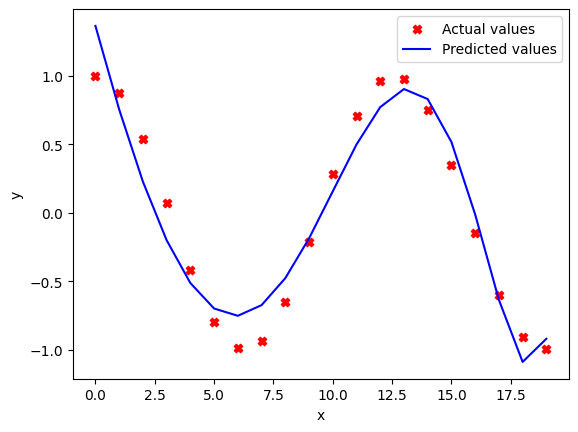

In [38]:
# Complex Functions
x = np.arange(0,20,1)
y = np.cos(x/2)

X = np.c_[x, x**2, x**3, x**4, x**5, x**6, x**7, x**8, x**9, x**10, x**11, x**12, x**13]
X = z_score_norm(X)  # Normalize the features

# Initialize weights for each feature
w_init = np.random.rand(X.shape[1])
b = 5

# Gradient Descent parameters
alpha = 0.1
num_iters = 100000

# Run Gradient Descent
w_opt, b_opt, cost_history = perform_multiple_gradient_descent(w_init, b, X, y, alpha, num_iters)

print(x, y)

# Plot original data and predictions
plt.scatter(x, y, c='r', marker='X', label="Actual values")
plt.plot(x, X@w_opt + b_opt, label="Predicted values", color='blue')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.show()